## Simple example comparing land variables from two simulations
Created by wwieder@ucar.edu, Jan 2024

- quickly (and inaccurately) calculates 5 year mean from raw, .h0., files.
- plots global means and differences which  also not very nice to look at, especially since this points to a 4x5 grid.

In [1]:
%load_ext autoreload
%autoreload 2

from glob import glob
from os.path import join

import xarray as xr

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
CESM_output_dir = "/glade/campaign/cesm/development/cross-wg/diagnostic_framework/CESM_output_for_testing"
type = ['1850pAD','1850pSASU']
cases = ['ctsm51d159_f45_GSWP3_bgccrop_1850pAD', 'ctsm51d159_f45_GSWP3_bgccrop_1850pSASU']

In [3]:
# Parameters
CESM_output_dir = "/glade/campaign/cesm/development/cross-wg/diagnostic_framework/CESM_output_for_testing"
lc_kwargs = {"threads_per_worker": 1}
cases = [
    "ctsm51d159_f45_GSWP3_bgccrop_1850pAD",
    "ctsm51d159_f45_GSWP3_bgccrop_1850pSASU",
]
type = ["1850pAD", "1850pSASU"]
subset_kwargs = {}
product = "/glade/u/home/dbailey/CUPiD/examples/coupled_model/computed_notebooks/quick-run/land_comparison.ipynb"


In [4]:
# -- read only these variables from the whole netcdf files
# average over time
def preprocess (ds):
    variables = ['TOTECOSYSC', 'TOTVEGC','TOTSOMC',
                 'SOM_PAS_C_vr']

    ds_new= ds[variables]
    return ds_new



In [5]:
for c in range(len(cases)):

    sim_files =[]
    sim_path = f"{CESM_output_dir}/{cases[c]}/lnd/hist"
    sim_files.extend(sorted(glob(join(f"{sim_path}/{cases[c]}.clm2.h0.*.nc"))))
    # subset last 5 years of data 
    sim_files = sim_files[-60:None]
    print(f"All simulation files for {cases[c]}: [{len(sim_files)} files]")

    temp = xr.open_mfdataset(sim_files, decode_times=True, combine='by_coords',
                             parallel=False, preprocess=preprocess).mean('time')
  
    if c == 0:
        ds = temp
    else:
        ds = xr.concat([ds, temp],'case')
        
ds = ds.assign_coords({"case": type})

# Calculate differences
diff = ds.isel(case=1)  - ds.isel(case=0) 
rel_diff = diff / ds.isel(case=1) 

All simulation files for ctsm51d159_f45_GSWP3_bgccrop_1850pAD: [60 files]


All simulation files for ctsm51d159_f45_GSWP3_bgccrop_1850pSASU: [60 files]


### Quickplots of pSASU results & difference from pAD

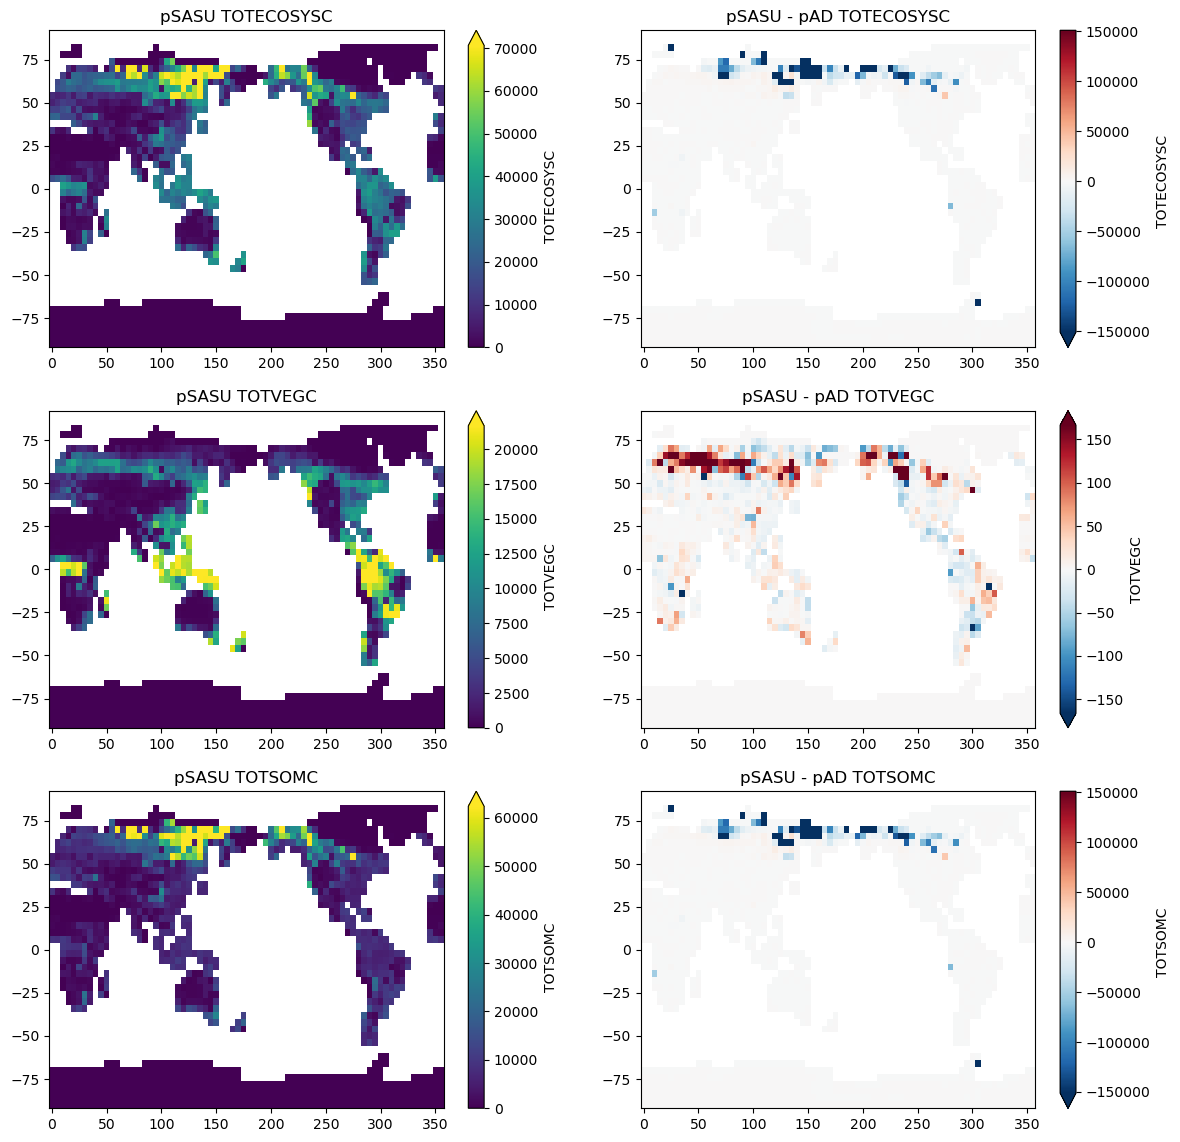

In [6]:
plt.figure(figsize=[14,14])
var = ['TOTECOSYSC' ,'TOTVEGC','TOTSOMC']
#var = ['GPP' ,'ELAI','ALT']
i = 1
for v in range(len(var)):
    plt.subplot(3, 2, i)
    ds[var[v]].isel(case=1).plot(robust=True)  
    plt.title("pSASU "+ var[v])
    plt.xlabel(None)
    plt.ylabel(None)
    i = i+1
    
    plt.subplot(3, 2, i)
    diff[var[v]].plot(robust=True) 
    plt.title("pSASU - pAD "+ var[v]) 
    plt.xlabel(None)
    plt.ylabel(None)   
    i = i+1


### lower soil C stocks at high latitues
- Look at depth profiles of C pools for a few points (also hard coded for now)

Text(0, 0.5, '')

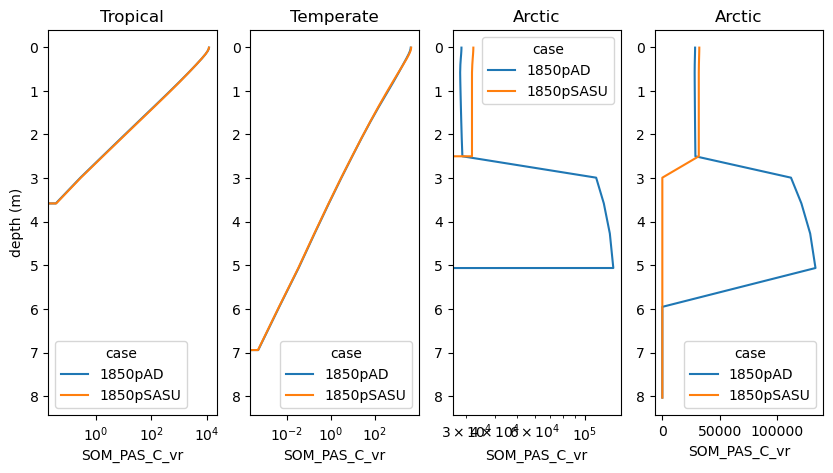

In [7]:
plt.figure(figsize=[10,5])
var = 'SOM_PAS_C_vr'
plt.subplot(1, 4, 1)
ds[var].sel(lon=300,lat=-10, method='nearest').plot(hue='case',y='levsoi') ;
plt.gca().invert_yaxis() ;
plt.title('Tropical')
plt.ylabel('depth (m)')
plt.xscale('log',base=10) 
#plt.ylim(6,0)


plt.subplot(1, 4, 2)
ds[var].sel(lon=25,lat=50, method='nearest').plot(hue='case',y='levsoi') ;
plt.gca().invert_yaxis() ;
plt.title('Temperate')
plt.ylabel(None)
plt.xscale('log',base=10) 
#plt.ylim(6,0)

plt.subplot(1, 4, 3)
ds[var].sel(lon=155,lat=66, method='nearest').plot(hue='case',y='levsoi') ;
plt.gca().invert_yaxis() ;
plt.title('Arctic')
plt.ylabel(None)
plt.xscale('log',base=10) 
#plt.ylim(6,0)


plt.subplot(1, 4, 4)
ds[var].sel(lon=155,lat=66, method='nearest').plot(hue='case',y='levsoi') ;
plt.gca().invert_yaxis() ;
plt.title('Arctic')
plt.ylabel(None)
#plt.ylim(6,0)